In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [150]:
from utils.processing import *
from utils.visualisation import *

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 80)

In [109]:
df = pd.read_csv('data/train.csv')
df_cleaned = df.copy()

In [110]:
df.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-street-81-adxawp85buupmsq7gwdjverc,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north avenue 4,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-estate-demrpm6ryc3l9buf846erprb,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/meyerhouse,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/leedon-green,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/one-bernam,1.273959,103.843635,0,anson,downtown core,1764000.0


In [51]:
# 99 percentile of price (remove top 1% price as outliers)
price_99pct = 22890000

### Property Type

In [111]:
df.groupby('property_type', dropna=False).agg({'listing_id':'nunique'}).head(10)

,listing_id
property_type,
Apartment,101
Bungalow,127
Cluster House,31
Condo,1743
Conservation House,6
Corner Terrace,46
Executive Condo,190
Hdb,509
Hdb 2 Rooms,47


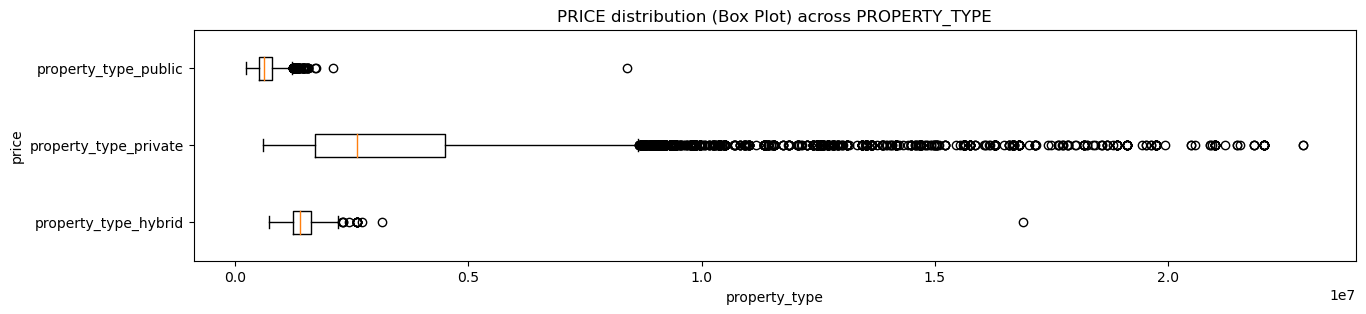

In [112]:
df_cleaned = preprocess_property_type(df_cleaned)
categories = ['property_type_private', 'property_type_hybrid', 'property_type_public']
plot_boxplot(df_cleaned, feature='property_type', y='price', y_min=0, y_max=price_99pct)

In [113]:
df_cleaned.groupby('property_type', dropna=False).agg({'listing_id':'nunique'})

,listing_id
property_type,
property_type_hybrid,1010
property_type_private,12912
property_type_public,6332


### Tenure

In [114]:
df.groupby('tenure', dropna=False).agg({'listing_id':'nunique'})

,listing_id
tenure,
100-year leasehold,1
102-year leasehold,2
103-year leasehold,189
110-year leasehold,25
929-year leasehold,2
946-year leasehold,10
947-year leasehold,1
956-year leasehold,12
99-year leasehold,11407


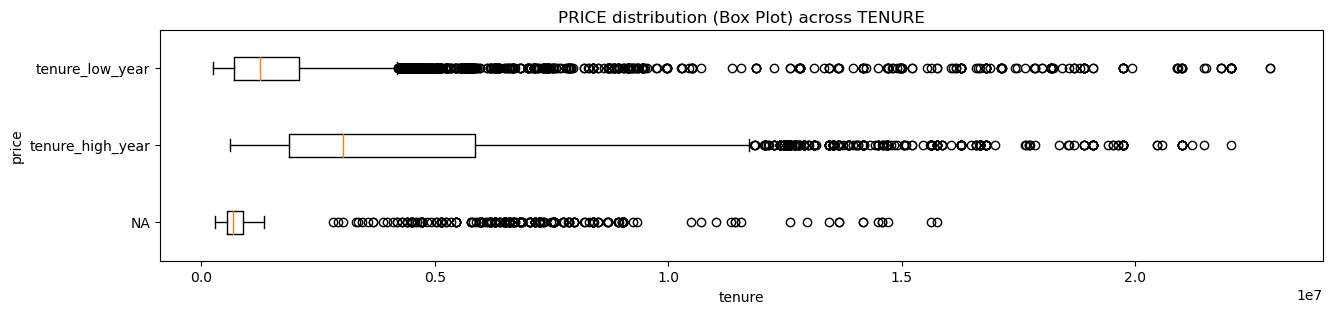

In [115]:
df_cleaned = preprocess_tenure(df_cleaned)
categories = ['tenure_low_year', 'tenure_high_year', 'tenure_NA']
plot_boxplot(df_cleaned, feature='tenure', y='price', y_min=0, y_max=price_99pct, figsize=(15, 3))

In [116]:
df_cleaned.groupby('tenure', dropna=False).agg({'listing_id':'nunique'})

,listing_id
tenure,
NA,1723
tenure_high_year,6907
tenure_low_year,11624


### Built Year 

In [117]:
df.groupby('built_year', dropna=False).agg({'listing_id':'nunique'}).sort_values('built_year')

,listing_id
built_year,
1963.0,8
1967.0,38
1968.0,6
1969.0,41
1970.0,108
...,...
2025.0,1534
2026.0,1162
2027.0,381


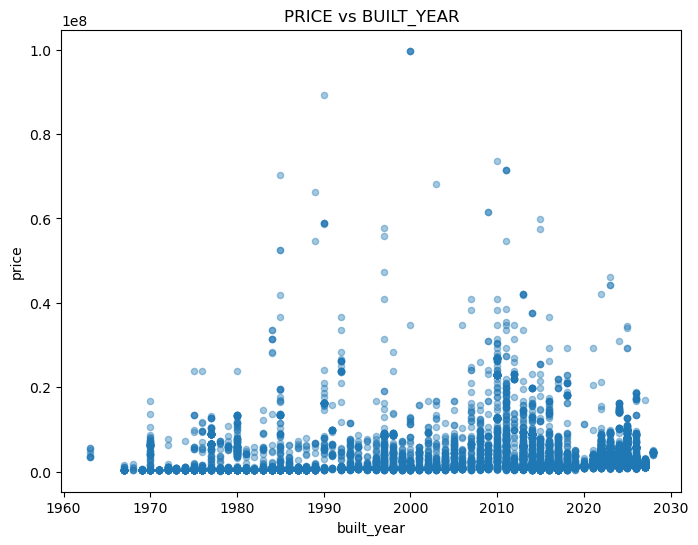

In [118]:
plot_scatterplot(df_cleaned, X='built_year', y='price', y_min=0, y_max=1e8, figsize=(8, 6))

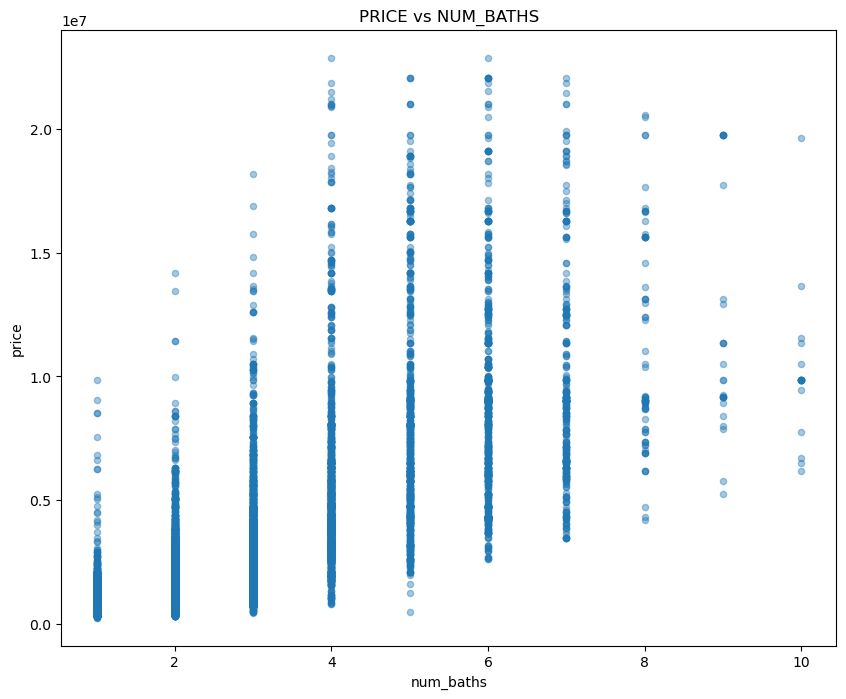

In [119]:
plot_scatterplot(df_cleaned, X='num_baths', y='price', y_min=0, y_max=price_99pct, figsize=(10, 8))

### Num Beds, Num Baths

In [120]:
# num_beds
df.groupby(['num_beds'], dropna=False).agg({'listing_id':'nunique'})

,listing_id
num_beds,
1.0,1683
2.0,4364
3.0,7936
4.0,3565
5.0,1626
6.0,767
7.0,147
8.0,41
9.0,16


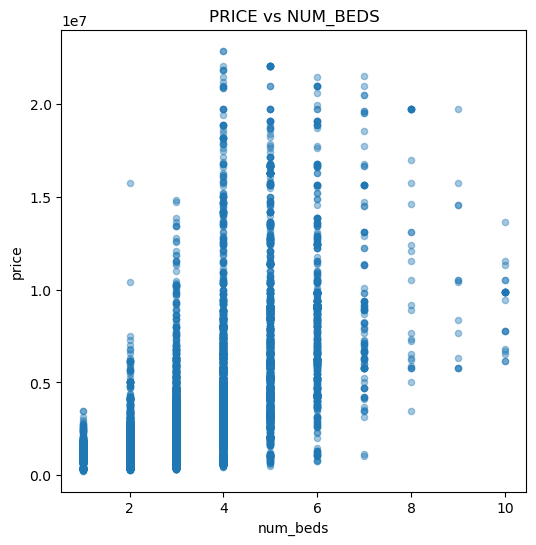

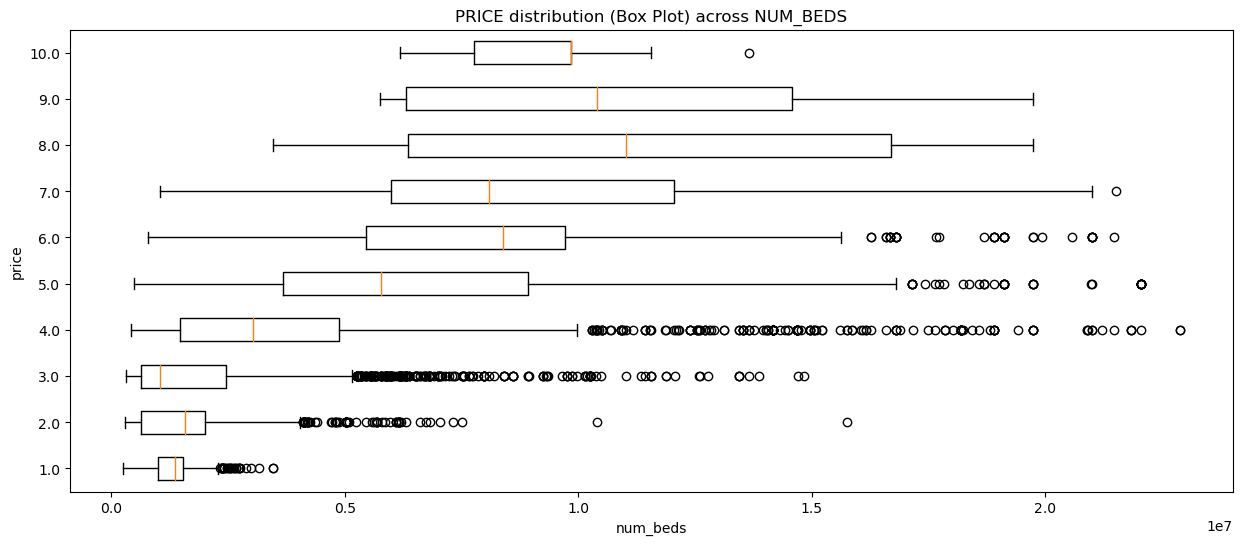

In [121]:
df_cleaned = preprocess_num_beds(df_cleaned)
plot_scatterplot(df_cleaned, 'num_beds', 'price', y_min=0, y_max=price_99pct, figsize=(6,6))
plot_boxplot(df_cleaned, feature='num_beds', y='price', y_min=0, y_max=price_99pct, figsize=(15, 6))

In [122]:
# num_baths
df.groupby(['num_baths'], dropna=False).agg({'listing_id':'nunique'})

,listing_id
num_baths,
1.0,2927
2.0,9754
3.0,3080
4.0,1743
5.0,927
6.0,851
7.0,382
8.0,96
9.0,35


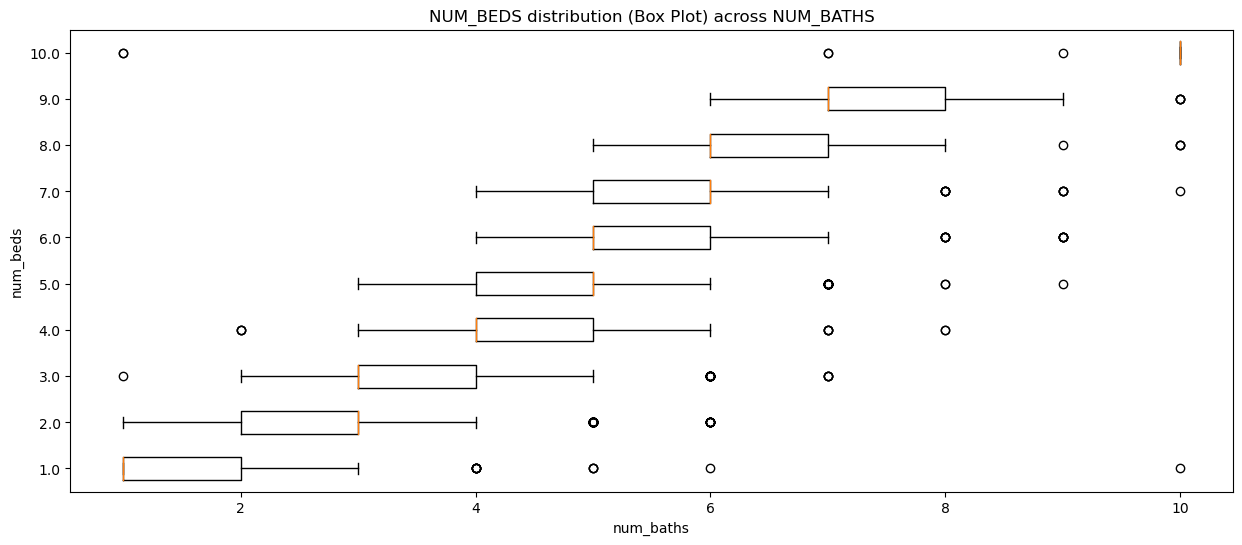

In [123]:
# Use relationship bet. num_beds and num_baths as treatment of missing values in num_baths
plot_boxplot(df[(df['num_beds'].notna()) & (df['num_baths'].notna())], feature='num_baths', y='num_beds', figsize=(15, 6))

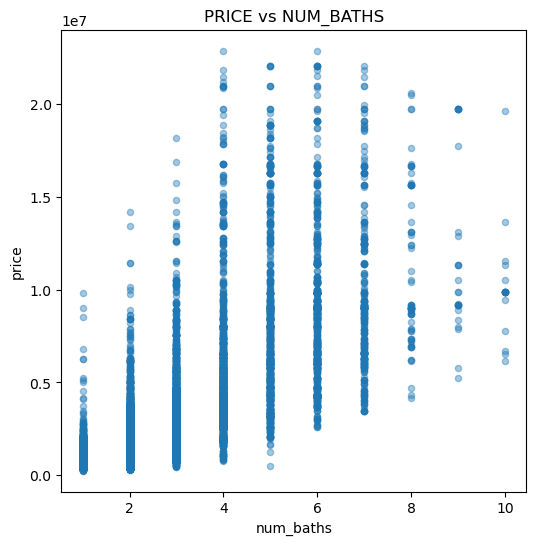

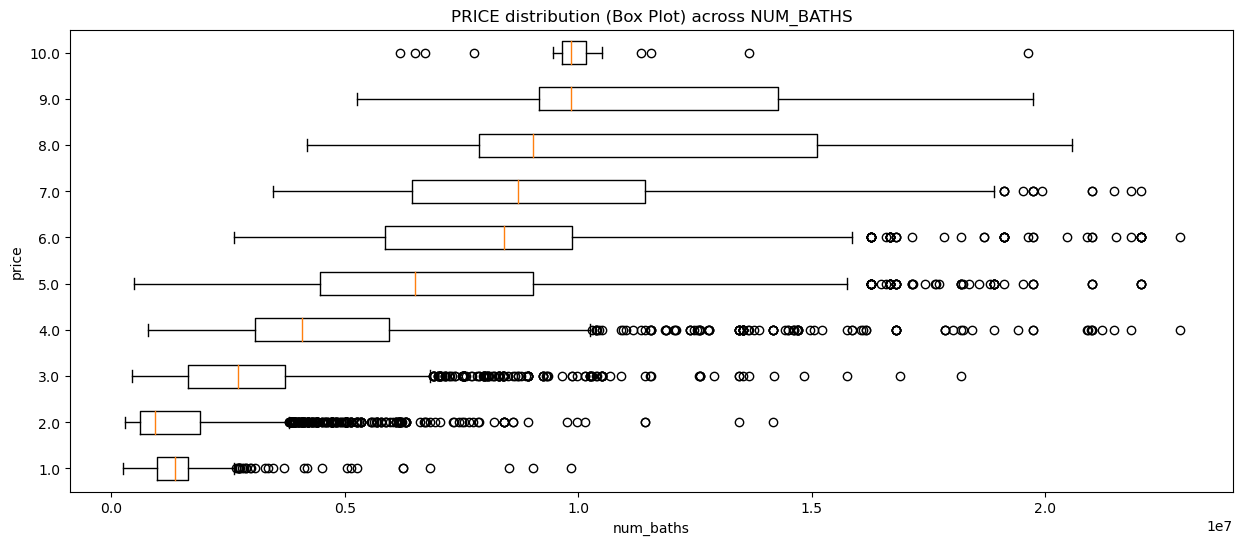

In [124]:
df_cleaned = preprocess_num_baths(df_cleaned)
plot_scatterplot(df_cleaned, 'num_baths', 'price', y_min=0, y_max=price_99pct, figsize=(6,6))
plot_boxplot(df_cleaned, feature='num_baths', y='price', y_min=0, y_max=price_99pct, figsize=(15, 6))

In [125]:
df_cleaned.groupby(['num_baths'], dropna=False).agg({'listing_id':'nunique'})

,listing_id
num_baths,
1.0,2898
2.0,10027
3.0,3135
4.0,1742
5.0,975
6.0,859
7.0,382
8.0,96
9.0,35


In [126]:
df.shape

(20254, 21)

In [127]:
# Drop 80 data points during processing of num_beds
df_cleaned.shape

(20174, 25)

### Size Sqft

In [128]:
df.groupby('size_sqft', dropna=False).size()

size_sqft
0          1
65         1
92         1
102        1
103        2
          ..
30000      1
70000      1
86080      1
1185000    1
1496000    1
Length: 1406, dtype: int64

In [129]:
df_cleaned = preprocess_size_sqft(df_cleaned)

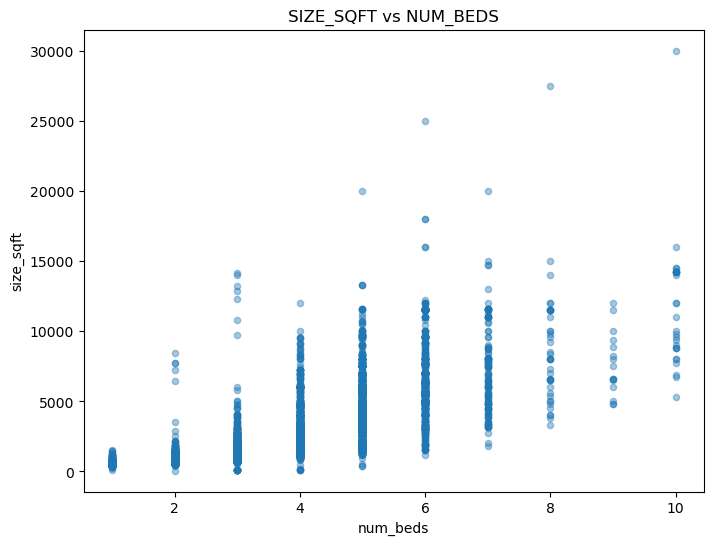

In [130]:
plot_scatterplot(df_cleaned, X='num_beds', y='size_sqft', y_min=0, y_max=50000, figsize=(8, 6))

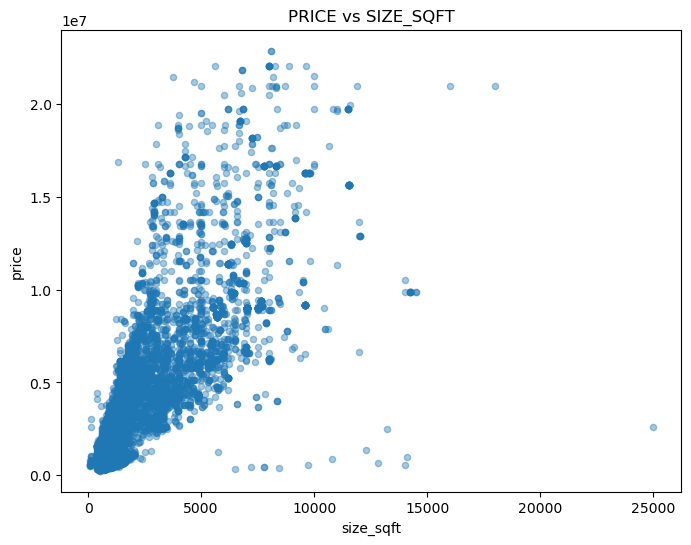

In [131]:
plot_scatterplot(df_cleaned, X='size_sqft', y='price', y_min=0, y_max=price_99pct, figsize=(8, 6))

### Floor Level

In [132]:
df.groupby('floor_level', dropna=False).agg({'listing_id':'nunique'})

,listing_id
floor_level,
ground,178
ground (9 total),4
high,1674
high (10 total),1
high (17 total),1
high (23 total),1
high (25 total),2
high (70 total),4
high (9 total),1


In [151]:
df_cleaned = preprocess_floor_level(df_cleaned)
df_cleaned.groupby('floor_level', dropna=False).agg({'listing_id':'nunique'})

,listing_id
floor_level,
NA,16679
ground,182
high,1671
low,721
mid,703
penthouse,97
top,116


### Furnishing

In [133]:
df.groupby('furnishing', dropna=False).agg({'listing_id':'nunique'})

,listing_id
furnishing,
fully,529
na,10
partial,2989
unfurnished,2010
unspecified,14716


In [134]:
df_cleaned = preprocess_furnishing(df_cleaned)
df_cleaned.groupby('furnishing', dropna=False).agg({'listing_id':'nunique'})

,listing_id
furnishing,
fully,523
partial,2977
unfurnished,2003
unspecified,14666


### Available Unit Types

In [147]:
df_cleaned.groupby('available_unit_types', dropna=False).agg({'listing_id':'nunique'})

,listing_id
available_unit_types,
1 br,24
"1, 2 br",182
"1, 2, 3 br",619
"1, 2, 3, 4 br",1679
"1, 2, 3, 4, 5 br",1535
...,...
"studio, 4, 6, 7 br",3
"studio, 4, 6, 7, 8, 10 br",8
"studio, 5, 6 br",1


### Total Num Units

In [144]:
df.groupby('total_num_units', dropna=False).agg({'listing_id':'nunique'})

,listing_id
total_num_units,
4.0,2
5.0,2
6.0,172
7.0,8
8.0,34
...,...
1793.0,1
1862.0,43
2203.0,30


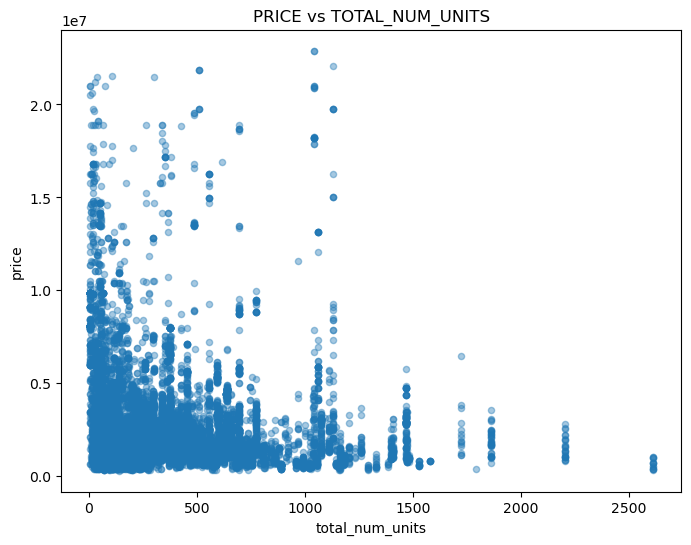

In [145]:
plot_scatterplot(df_cleaned, X='total_num_units', y='price', y_min=0, y_max=price_99pct, figsize=(8, 6))